In [13]:
import tensorflow_datasets as tfds
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

In [14]:
vocab_size = 10000
oov = '<oov>'
trunc_type = 'post'
max_len = 120
embedding_dim = 16

In [15]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train, test = imdb['train'], imdb['test']

In [16]:
train_sentences = []
train_labels = []
test_sentences = []
test_labels = []

for s, l in train:
    train_sentences.append(str(s.numpy()))
    train_labels.append(l.numpy())

for s, l in test:
    test_sentences.append(str(s.numpy()))
    test_labels.append(l.numpy())
    
train_labels_final = np.array(train_labels)
test_labels_final = np.array(test_labels)

In [17]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov)
tokenizer.fit_on_texts(train_sentences)

In [18]:
word_index = tokenizer.word_index
reverse_index = defaultdict(None, {v:k for k, v in word_index.items()})

In [24]:
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen=max_len, truncating=trunc_type)

In [25]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen = max_len, truncating = trunc_type)

In [26]:
def decode_review(review):
    return ' '.join(reverse_index.get(a, '?') for a in review)

decode_review(test_sequences[0])

"b there are films that make careers for george romero it was night of the living dead for kevin smith <oov> for robert rodriguez el <oov> add to that list <oov> <oov> absolutely amazing <oov> a <oov> less flawless film making and as assured and as professional as any of the aforementioned movies i haven't laughed this hard since i saw the full monty and even then i don't think i laughed quite this hard so to speak <oov> talent is considerable <oov> a <oov> less is so chock full of double <oov> that one would have to sit down with a copy of this script and do a line by line examination of it to fully appreciate the uh <oov> and <oov> of it every shot is beautifully composed a clear sign of a sure handed director and the performances all around are solid there's none of the over the top scenery chewing one <oov> expected from a film like this <oov> a <oov> less is a film whose time has come"

In [95]:
def get_model():
    model = keras.Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
    model.add(layers.Bidirectional(layers.LSTM(32)))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def get_conv_model():
    model = keras.Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
    model.add(layers.Conv1D(256, 7, activation='relu'))
    model.add(layers.Dense(24, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

model = get_pretrained_model()

In [96]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [97]:
CHECKPOINT_DIR = 'data/model/sentiment'

In [98]:
history = model.fit(padded, 
                    train_labels_final, 
                    validation_data=(test_padded, test_labels_final), 
                    epochs=20, initial_epoch=0,
                    callbacks=[keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10),
                              keras.callbacks.ModelCheckpoint(CHECKPOINT_DIR, monitor="val_accuracy", save_only_best=True)])

Epoch 1/20
782/782 [==============================] - 29s 35ms/step - loss: 0.6936 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5000


INFO:tensorflow:Assets written to: data/model/sentiment/assets


INFO:tensorflow:Assets written to: data/model/sentiment/assets


Epoch 2/20
782/782 [==============================] - 27s 35ms/step - loss: 0.6925 - accuracy: 0.5062 - val_loss: 0.6432 - val_accuracy: 0.6527


INFO:tensorflow:Assets written to: data/model/sentiment/assets


INFO:tensorflow:Assets written to: data/model/sentiment/assets


Epoch 3/20
782/782 [==============================] - 27s 35ms/step - loss: 0.5193 - accuracy: 0.7507 - val_loss: 0.4456 - val_accuracy: 0.7900


INFO:tensorflow:Assets written to: data/model/sentiment/assets


INFO:tensorflow:Assets written to: data/model/sentiment/assets


Epoch 4/20
782/782 [==============================] - 28s 36ms/step - loss: 0.4227 - accuracy: 0.8088 - val_loss: 0.4088 - val_accuracy: 0.8128


INFO:tensorflow:Assets written to: data/model/sentiment/assets


INFO:tensorflow:Assets written to: data/model/sentiment/assets


Epoch 5/20
782/782 [==============================] - 29s 38ms/step - loss: 0.3870 - accuracy: 0.8278 - val_loss: 0.3890 - val_accuracy: 0.8254


INFO:tensorflow:Assets written to: data/model/sentiment/assets


INFO:tensorflow:Assets written to: data/model/sentiment/assets


Epoch 6/20
782/782 [==============================] - 29s 37ms/step - loss: 0.3549 - accuracy: 0.8444 - val_loss: 0.3733 - val_accuracy: 0.8284


INFO:tensorflow:Assets written to: data/model/sentiment/assets


INFO:tensorflow:Assets written to: data/model/sentiment/assets


Epoch 7/20
271/782 [=========>....................] - ETA: 14s - loss: 0.3397 - accuracy: 0.8491

KeyboardInterrupt: 

In [20]:
with open('data/bleak.txt', 'rt') as f:
    content = f.read()
print(content[:100])

﻿CHAPTER I

In Chancery


London. Michaelmas term lately over, and the Lord Chancellor sitting
in Li


In [23]:
from nltk import sent_tokenize
bleak_sentences = sent_tokenize(content)

In [25]:
bleak_sequences = tokenizer.texts_to_sequences(bleak_sentences)

In [28]:
bleak_padded_sequneces = pad_sequences(bleak_sequences, maxlen=100, truncating='post')

In [30]:
predictions = model.predict(bleak_padded_sequneces)

In [44]:
for sentence, sentiment in list(zip(bleak_sentences, predictions>.5))[:5]:
    print(sentence, sentiment)

﻿CHAPTER I

In Chancery


London. [ True]
Michaelmas term lately over, and the Lord Chancellor sitting
in Lincoln's Inn Hall. [False]
Implacable November weather. [ True]
As much mud in
the streets as if the waters had but newly retired from the face of
the earth, and it would not be wonderful to meet a Megalosaurus,
forty feet long or so, waddling like an elephantine lizard up Holborn
Hill. [ True]
Smoke lowering down from chimney-pots, making a soft black
drizzle, with flakes of soot in it as big as full-grown
snowflakes--gone into mourning, one might imagine, for the death of
the sun. [ True]


In [43]:
model.predict(padded[0].reshape(1, -1)) # neg review gives number < .5 thresh

array([[0.00555468]], dtype=float32)

In [49]:
preds = predictions>.5

In [50]:
len(bleak_sentences)

20561

In [56]:
window_size = 100
bucketed = [np.sum(preds[a:a+window_size]) for a in range(0, len(preds), window_size)]

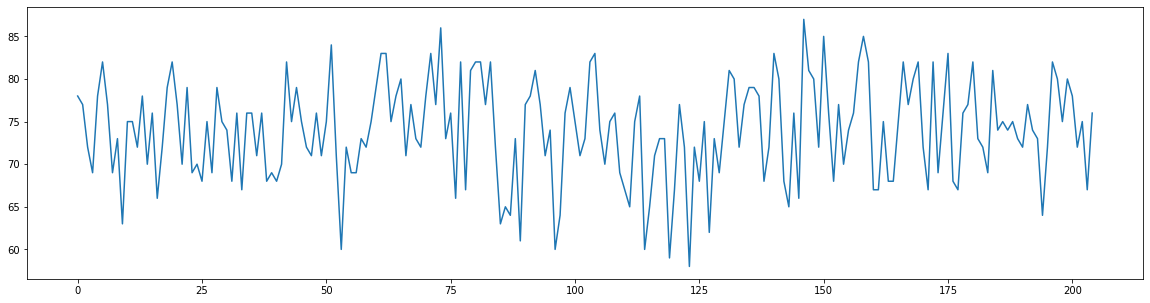

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,5))
_ = ax.plot(bucketed[:-1])

In [87]:
with open('data/glove/glove.6B.200d.txt', 'rt') as f:
    content = f.readlines()

In [88]:
print(content[0].strip().split(' ')[:5])
print(content[1].strip().split(' ')[:5])


['the', '-0.071549', '0.093459', '0.023738', '-0.090339']
[',', '0.17651', '0.29208', '-0.0020768', '-0.37523']


In [89]:
len(word_index)

86539

In [90]:
little_glove = {}
for line in content:
    values = line.strip().split(' ')
    word = values[0]
    coefficients = np.asarray(values[1:])
    little_glove[word] = coefficients

In [91]:
embeddings_matrix = np.zeros([len(word_index)+1, 200], dtype='float32')
embeddings_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [92]:
for word, i in word_index.items():
    emb = little_glove.get(word)
    if emb is not None:
        embeddings_matrix[i] = emb

In [93]:
embeddings_matrix.shape

(86540, 200)

In [94]:
def get_pretrained_model():
    model = keras.Sequential()
    model.add(layers.Embedding(len(word_index)+1, 200, input_length=max_len, weights=[embeddings_matrix], trainable=False))
    model.add(layers.Bidirectional(layers.LSTM(32)))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model
model = get_pretrained_model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 120, 200)          17308000  
_________________________________________________________________
bidirectional_7 (Bidirection (None, 64)                59648     
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 17,368,045
Trainable params: 60,045
Non-trainable params: 17,308,000
_________________________________________________________________
